# <span style="color:blue">Project 1: Lower Back Pain</span> #  
## Tiffany Lontoc ##  
### Tech Fundamentals for Business Analytics ###
#### November 2, 2017 ####

In [40]:
#Clean up the data

%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np

#Read in Spine dataset
data=pd.read_csv("../Project1/Dataset_spine.csv")

#Drop the extra column
data.drop('Unnamed: 13', inplace=True, axis=1)

#Change the 'Class_att' column to categorical values
data['Class_att']=data['Class_att'].map({'Normal':0,'Abnormal':1})

#Rename columns with appropriate variable names
data.columns=["PelvicIncidence",'PelvicTilt','LumbarLordosisAngle',
               'SacralSlope', 'PelvicRadius','SpondylolisthesisDegree',
               'PelvicSlope','DirectTilt','ThoracicSlope',
               'CervicalTilt','SacrumAngle','ScoliosisSlope','Outcome']

In [41]:
data.head()

,PelvicIncidence,PelvicTilt,LumbarLordosisAngle,SacralSlope,PelvicRadius,SpondylolisthesisDegree,PelvicSlope,DirectTilt,ThoracicSlope,CervicalTilt,SacrumAngle,ScoliosisSlope,Outcome
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1


In [42]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PelvicIncidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
PelvicTilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
LumbarLordosisAngle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
SacralSlope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
PelvicRadius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
SpondylolisthesisDegree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
PelvicSlope,310.0,0.472979,0.285787,0.003220,0.224367,0.475989,0.704846,0.998827
DirectTilt,310.0,21.321526,8.639423,7.027000,13.054400,21.907150,28.954075,36.743900
ThoracicSlope,310.0,13.064511,3.399713,7.037800,10.417800,12.938450,15.889525,19.324000
CervicalTilt,310.0,11.933317,2.893265,7.030600,9.541140,11.953835,14.371810,16.821080


1=Abnormal, 0=Normal
 1    210
0    100
Name: Outcome, dtype: int64


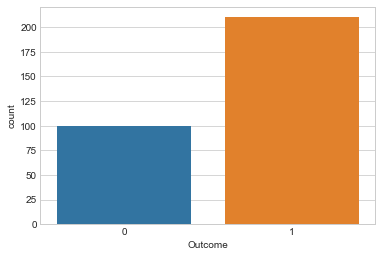

In [43]:
#Generate a count of how many values in the dataset correspond to Abnormal and Normal values
print("1=Abnormal, 0=Normal\n",data["Outcome"].value_counts())

#Plot the ratio of Abnormal to Normal outcomes in dataset
sns.countplot(x='Outcome', data=data)

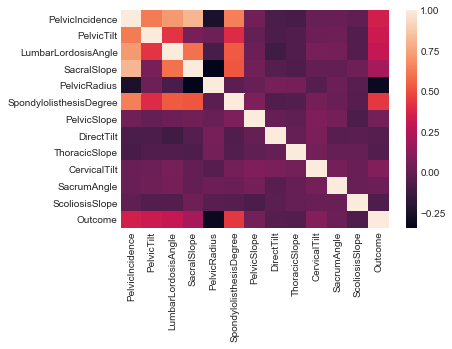

In [140]:
#Create a correlation matrix of the data using the corr command
corr=data.corr()

#Use the heatmap command to plot the correlation matrix
sns.heatmap(corr)


In [128]:
#Split the dataset into the training and testing datasets for future analysis
from sklearn.utils import shuffle
from sklearn import linear_model

#Shuffle data before splitting into test and train sets
new_data=shuffle(data)

#Split data into two arrays
data_split=np.array_split(new_data,2)

#Create a test and train set from the split dataframe
train=data_split[0]
test=data_split[1]

#Write out the train and test sets to csv files
train.to_csv('../Project1/train.csv')
test.to_csv('../Project1/test.csv')

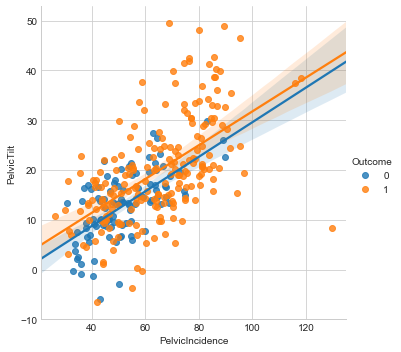

In [124]:
#Visualization #1: Scatterplot of the PelvicIncidence and PelvicTilt variables

import seaborn as sns
import matplotlib.pyplot as plt

#Create a scatterplot
sns.lmplot('PelvicIncidence','PelvicTilt', data=data, hue="Outcome")

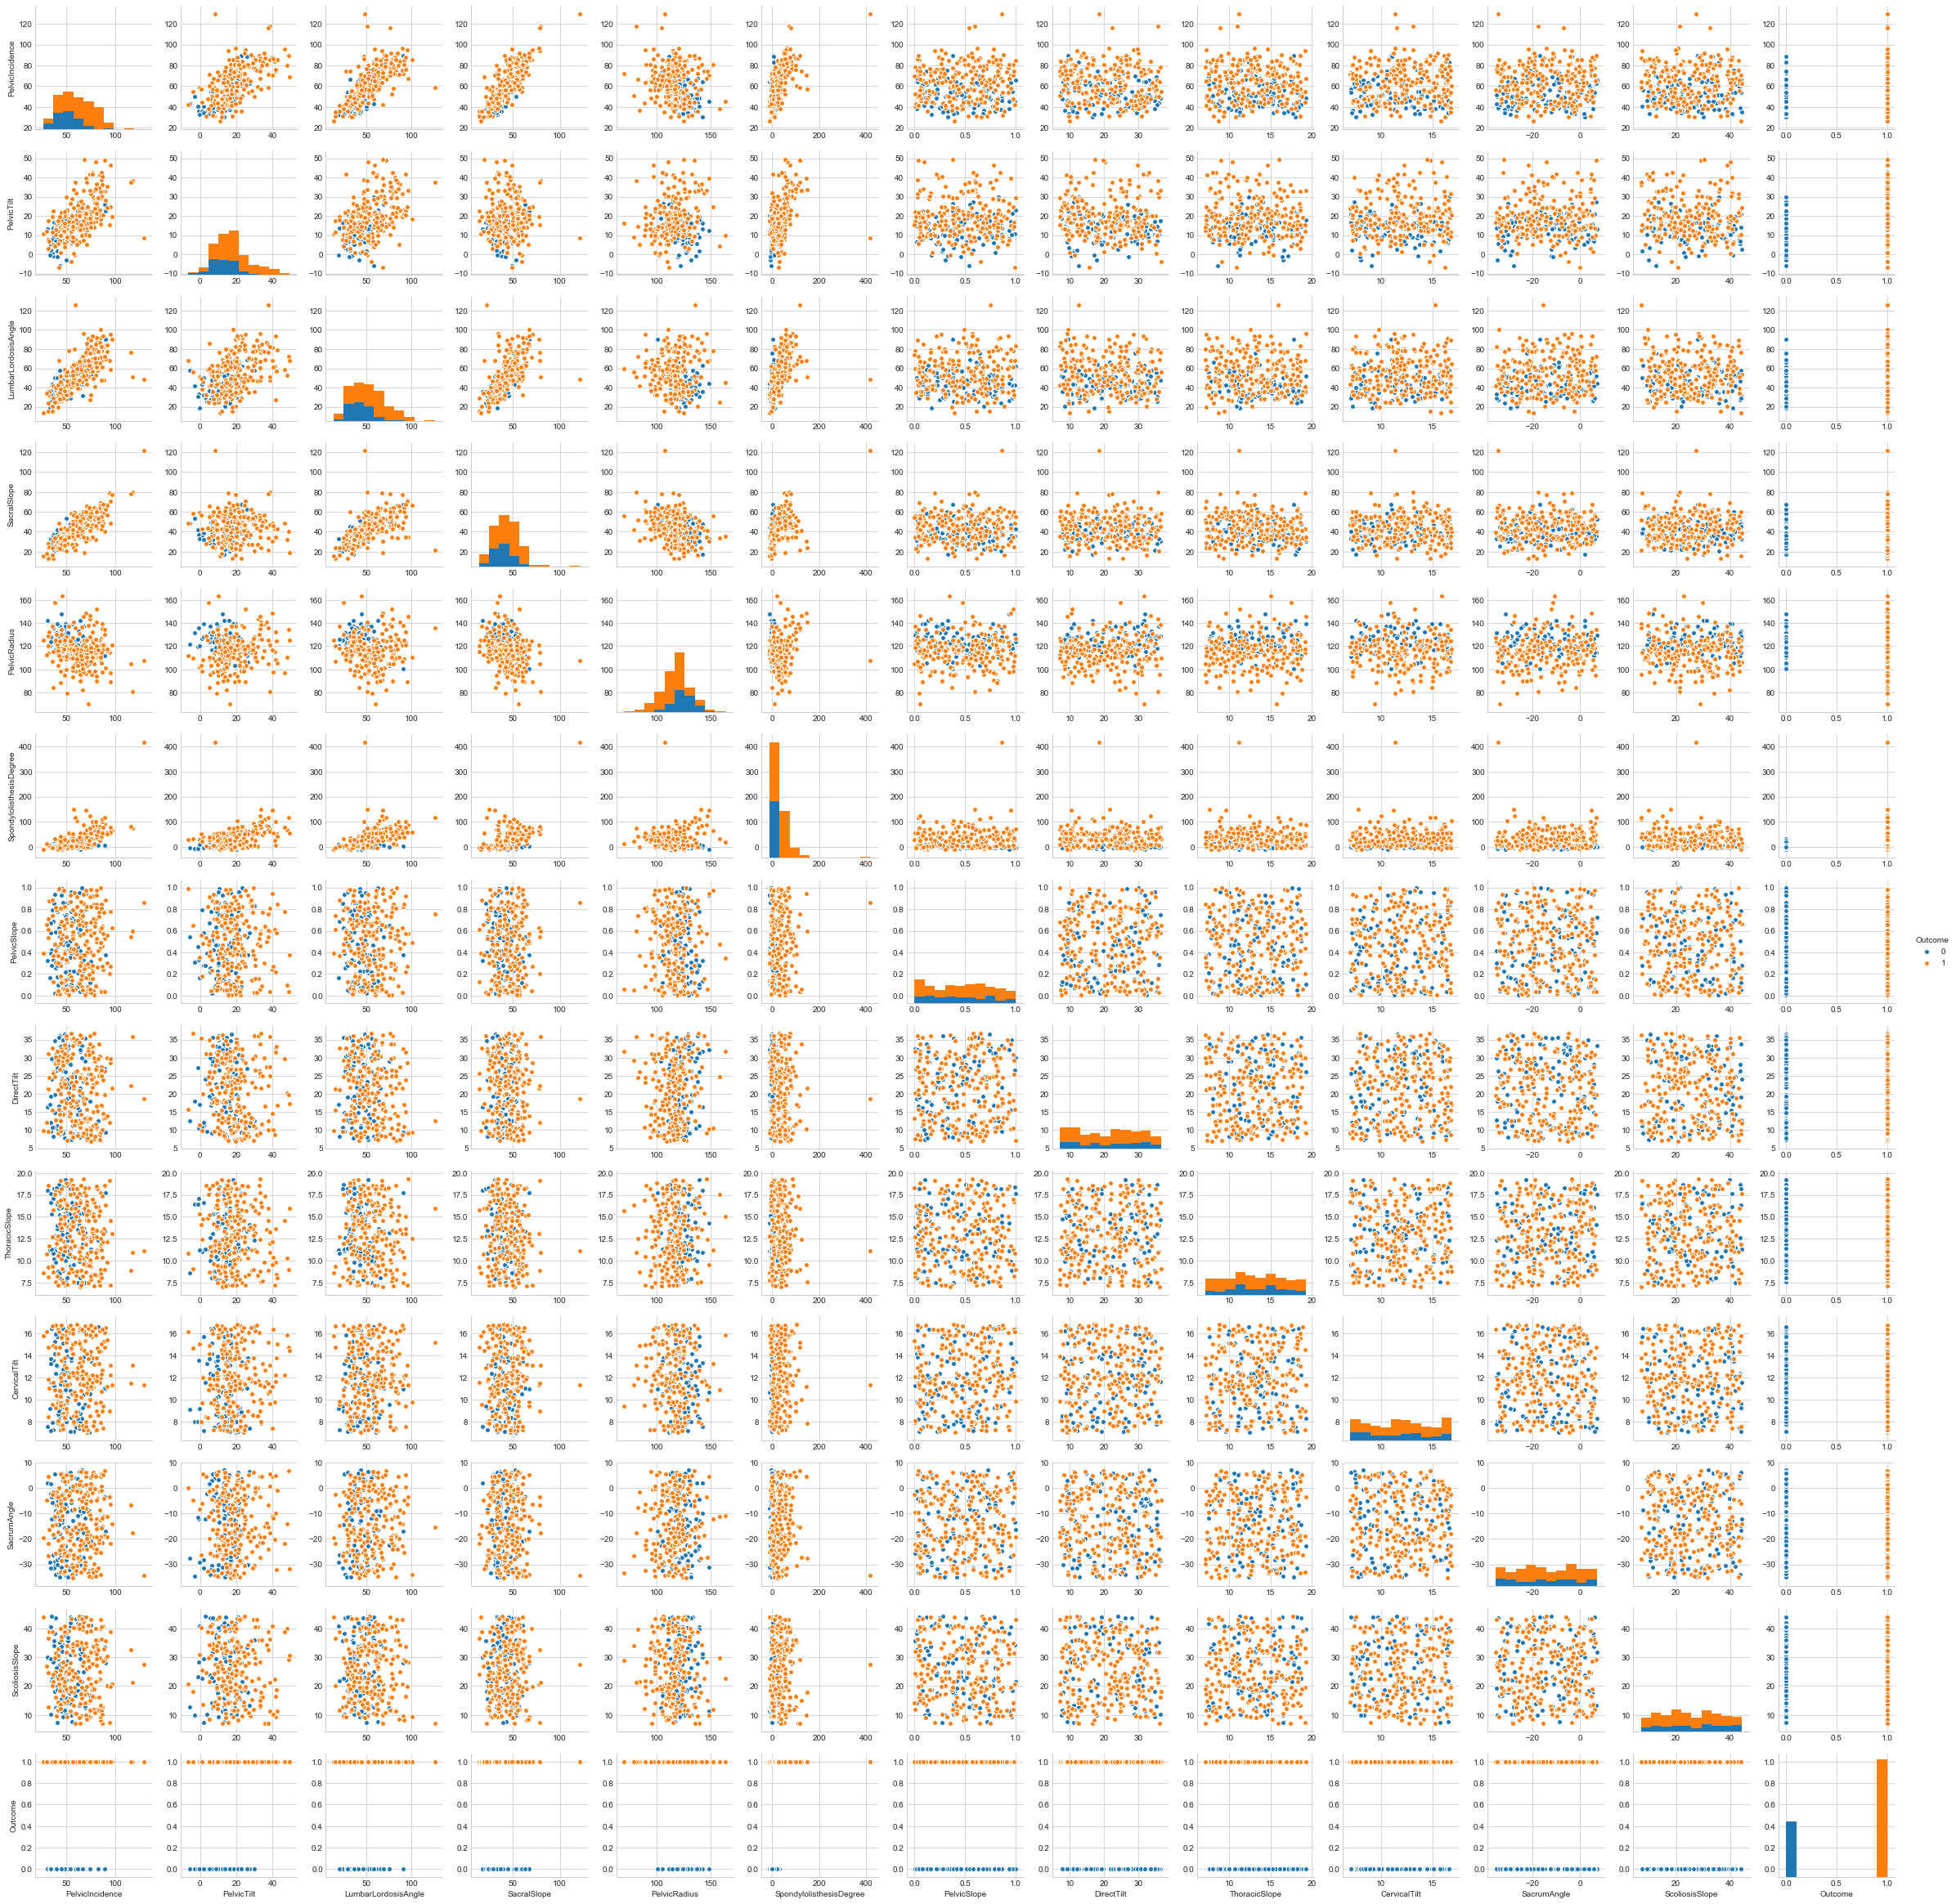

In [34]:
#Visualization #2: Pairplot
#To see any correlations/relationships between any of the variables
import seaborn as sns

sns.set_style('whitegrid')

x= sns.pairplot(data, hue='Outcome')

Text(0.5,1,'Lower Back Pain Boxplot')

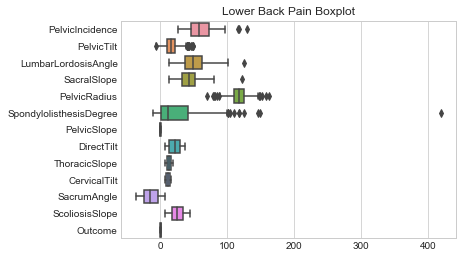

In [144]:
#Visualization #3: Box Plot
#Use a box plot in order to show the distribution of median, mode, range, and outliers of the variables in the dataset
sns.boxplot(data=data,orient='h').set_title("Lower Back Pain Boxplot")

## [Link to Tiffany's Github](https://github.com/tiflon/Project1) ##
